In [1]:
import csv
import codecs
import urllib.request
from collections import Counter
import glob
import codecs
import re
import pandas as pd
import math
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from pylab import rcParams
from numpy.linalg import inv
from sympy import *

<h2>2 Gradient Descent and Step Length Controller:
In this part, you are required to optimize the booth function using gradient descent. The Figure below provides
a visual representation of the booth function in a 3D plot.

<h2>1

In [2]:
def f(x, y):
    return (x+2*y)**2+(2*x+y-5)**2

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

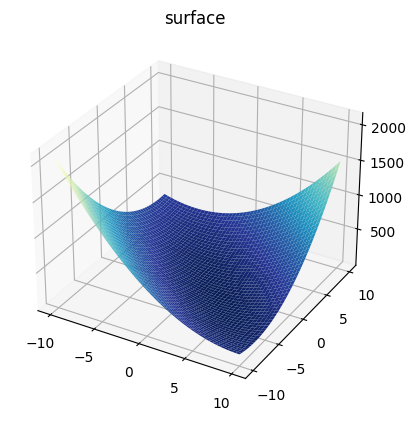

In [3]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=plt.cm.YlGnBu_r, edgecolor='none')
ax.set_title('surface');
# ax.view_init(10,20)

<h2>2

In [4]:
# create a "symbol" called x
x, y= symbols('x y', real=True)
 
#Define function
f = (x+2*y)**2+(2*x+y-5)**2
 
#Calculating Derivative
dx_f = f.diff(x)
dy_f = f.diff(y)

In [5]:
dx_f

10*x + 8*y - 20

In [6]:
dy_f

8*x + 10*y - 10

<h2>3

In [7]:
x = np.arange(-4, 4)
y = np.arange(-4, 4)

In [8]:
f = (x+2*y)**2+(2*x+y-5)**2

In [9]:
f

array([433, 277, 157,  73,  25,  13,  37,  97])

In [10]:
# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    costList = []
    for i in range(0, numIterations):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        cost = np.sum(error ** 2) / (2 * m)
        costList.append(cost)
        gradient = np.dot(x.T, error) / m
        theta = theta - alpha * gradient
    return theta, costList


In [11]:
n = np.max(x.shape)
x = np.vstack([np.ones(n), x, y]).T      
m, n = np.shape(x)
numIterations= 1000000
alpha = 0.0001
theta = np.random.rand(n)


In [12]:
theta, _ = gradientDescent(x, f, theta, alpha, m, numIterations)
print('Theta is: ', theta)

Theta is:  [115.         -23.93354681 -24.06645319]


<h2>5

In [13]:
def backTrackingGradientDescent(x, y, theta, alpha, m, numIterations, beta):
    costList=[]
    t=1
    for i in range(0, numIterations):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        cost = np.sum(error ** 2) / (2 * m)
        costList.append(cost)
        gradient = np.dot(x.T, error) / m
        theta = theta - t*alpha * gradient
        t=beta*t
    return theta, t, costList


In [14]:
theta, t, _ = backTrackingGradientDescent(x, f, theta, alpha, m, 1000, beta=0.5)
print('Theta: \n', theta, '\n t is: \n', t)

Theta: 
 [115.         -23.93354681 -24.06645319] 
 t is: 
 9.332636185032189e-302
